# Cifar10 image classification using ANN and CNN in tensorflow keras
1. Accuracy in ann was 50%
2. Accuracy in simple cnn was 70%

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
X_train.shape, y_train.shape, X_train[0], y_train[0]

((50000, 32, 32, 3),
 (50000, 1),
 array([[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],
 
        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],
 
        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],
 
        ...,
 
        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],
 
        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],
 
        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
        

In [4]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train.shape, y_train[:3]

((50000,), array([6, 9, 9], dtype=uint8))

In [6]:
def plot_image(img, label):
    plt.figure(figsize=(3,3))
    plt.imshow(img)
    plt.title(label)
    plt.show()

In [7]:
classes = ['airplane', 
'automobile', 
'bird', 
'cat', 
'deer', 
'dog', 
'frog', 
'horse', 
'ship', 
'truck', ]
len(classes)

10

In [8]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

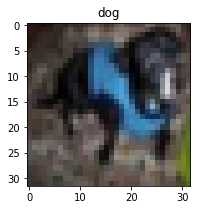

In [9]:
index = 27
plot_image(X_train[index], classes[y_train[index]])

In [10]:
# Check the maximum and minimum values of the arrays

np.min(X_train[0]), np.max(X_train[0])

(0, 255)

In [11]:
# Normalize the array for feeding into the neural network

X_train, X_test = X_train/255, X_test/255
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [12]:
np.min(X_train[0]), np.max(X_train[0])

(0.0, 1.0)

In [13]:
X_train.shape

(50000, 32, 32, 3)

In [14]:
# Define the dense neural network

model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(units=3000, activation='relu'),
    layers.Dense(units=1000, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

2022-07-04 08:31:26.340703: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-04 08:31:26.461314: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-04 08:31:26.462636: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-04 08:31:26.465795: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [15]:
# Train the model for 10 epochs
history = model.fit(X_train, y_train, validation_split=0.2, verbose=1, epochs=10)

2022-07-04 08:31:31.059631: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1250/1250 [==============================] - 6s 4ms/step - loss: 1.9195 - accuracy: 0.3183 - val_loss: 1.7635 - val_accuracy: 0.3713
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6831 - accuracy: 0.3980 - val_loss: 1.6657 - val_accuracy: 0.4100
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6092 - accuracy: 0.4191 - val_loss: 1.6251 - val_accuracy: 0.4243
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5561 - accuracy: 0.4445 - val_loss: 1.5851 - val_accuracy: 0.4397
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5085 - accuracy: 0.4588 - val_loss: 1.5509 - val_accuracy: 0.4500
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4763 - accuracy: 0.4688 - val_loss: 1.5369 - val_accuracy: 0.4544
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4507 - accuracy: 0.4809 - val_loss: 1.5106 - val_accuracy:

In [16]:
history_Dict = history.history
history_Dict

{'loss': [1.9194730520248413,
  1.6830841302871704,
  1.6092196702957153,
  1.5560519695281982,
  1.5084846019744873,
  1.4762769937515259,
  1.4507485628128052,
  1.4262186288833618,
  1.403691053390503,
  1.3843810558319092],
 'accuracy': [0.318325012922287,
  0.3980250060558319,
  0.4191499948501587,
  0.44452500343322754,
  0.4588499963283539,
  0.46882501244544983,
  0.4809499979019165,
  0.48669999837875366,
  0.49287500977516174,
  0.5016000270843506],
 'val_loss': [1.7635443210601807,
  1.665673851966858,
  1.625125527381897,
  1.5850740671157837,
  1.5508662462234497,
  1.536902904510498,
  1.510607361793518,
  1.5424586534500122,
  1.5617629289627075,
  1.4935985803604126],
 'val_accuracy': [0.37130001187324524,
  0.4099999964237213,
  0.4242999851703644,
  0.43970000743865967,
  0.44999998807907104,
  0.4544000029563904,
  0.4668999910354614,
  0.45730000734329224,
  0.4456999897956848,
  0.4772000014781952]}

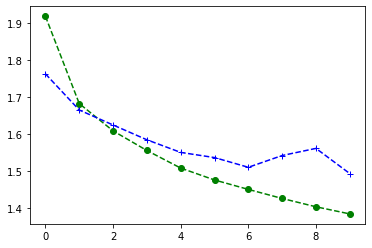

In [17]:
x = np.arange(0, 10, 1)
loss = history_Dict['loss']
val_loss = history_Dict['val_loss']
plt.plot(x, loss, 'go--')
plt.plot(x, val_loss, 'b+--')
plt.show()

## Model seems to have performed a bit poorly on validation set

In [18]:
# Predict results
preds = model.predict(X_test)

In [19]:
type(preds)

numpy.ndarray

In [20]:
preds.shape

(10000, 10)

In [21]:
preds_index = preds.argmax(axis=1)
preds_index.shape

(10000,)

In [22]:
# Check the performance of the model on test set
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
print(f"Accuracy score: {accuracy_score(preds_index, y_test)}")

Accuracy score: 0.4855


In [23]:
print(classification_report(preds_index, y_test))

              precision    recall  f1-score   support

           0       0.49      0.61      0.55       805
           1       0.59      0.63      0.61       937
           2       0.29      0.41      0.34       719
           3       0.22      0.36      0.28       629
           4       0.29      0.51      0.37       558
           5       0.40      0.38      0.39      1053
           6       0.76      0.40      0.52      1911
           7       0.56      0.53      0.54      1062
           8       0.68      0.56      0.61      1210
           9       0.57      0.51      0.54      1116

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.47     10000
weighted avg       0.54      0.49      0.50     10000



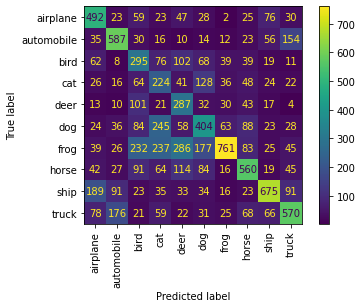

In [24]:
ConfusionMatrixDisplay.from_predictions(preds_index, y_test, display_labels=classes, xticks_rotation="vertical")

## So we see that performance of the model is just about 50%, which is poor.

## Now we will use CNN model

In [25]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(units=1000, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              2305000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [27]:
# Compile the model
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
# Train the model for 10 epochs
history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10


2022-07-04 08:32:19.809227: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1250/1250 [==============================] - 11s 4ms/step - loss: 1.3748 - accuracy: 0.5061 - val_loss: 1.1282 - val_accuracy: 0.5999
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0027 - accuracy: 0.6493 - val_loss: 0.9975 - val_accuracy: 0.6519
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.8016 - accuracy: 0.7207 - val_loss: 0.9214 - val_accuracy: 0.6794
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6259 - accuracy: 0.7818 - val_loss: 0.8894 - val_accuracy: 0.7049
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4525 - accuracy: 0.8442 - val_loss: 0.9387 - val_accuracy: 0.7119
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2928 - accuracy: 0.8993 - val_loss: 1.0839 - val_accuracy: 0.6998
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1849 - accuracy: 0.9373 - val_loss: 1.2738 - val_accuracy: 0.6978
Ep

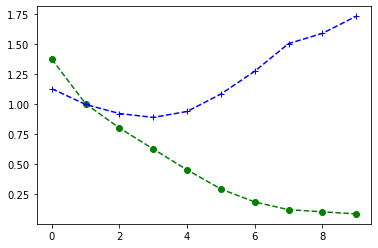

In [29]:
history_Dict = history.history
x = np.arange(0, 10, 1)
loss = history_Dict['loss']
val_loss = history_Dict['val_loss']
plt.plot(x, loss, 'go--')
plt.plot(x, val_loss, 'b+--')
plt.show()

In [30]:
# Test accuracy fot a small batch
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.7165 - accuracy: 0.6931


[1.7164692878723145, 0.6930999755859375]

In [31]:
# Compute the predictions
preds = model.predict(X_test)

In [32]:
preds[0]

array([2.1980221e-04, 7.1648486e-02, 1.8481191e-04, 1.8521915e-01,
       3.0543783e-04, 1.2801707e-01, 1.8494673e-03, 9.3054441e-06,
       6.1254621e-01, 2.6788015e-07], dtype=float32)

In [33]:
preds_index = preds.argmax(axis=1)
print(f"Accuracy score: {accuracy_score(preds_index, y_test)}")

Accuracy score: 0.6931


In [34]:
print(classification_report(preds_index, y_test))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1036
           1       0.78      0.87      0.82       903
           2       0.54      0.64      0.59       842
           3       0.57      0.45      0.50      1288
           4       0.66      0.65      0.65      1014
           5       0.58      0.58      0.58       999
           6       0.76      0.80      0.78       950
           7       0.77      0.74      0.75      1038
           8       0.76      0.83      0.79       922
           9       0.77      0.76      0.77      1008

    accuracy                           0.69     10000
   macro avg       0.69      0.70      0.70     10000
weighted avg       0.69      0.69      0.69     10000



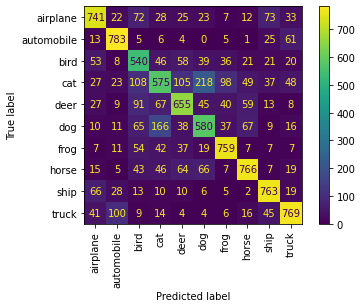

In [35]:
ConfusionMatrixDisplay.from_predictions(preds_index, y_test, 
                                    display_labels=classes, xticks_rotation="vertical")

# Achieved 66% accuracy, better than the ANN model